#<font color = 'blue'> **Assignment 5** </font>

This assignment covers some basics of convolutional neural networks (CNNs) for image classification with PyTorch deep learning framework, including the implementation of convolution, max-pooling, and fully connected layers in CNNs with relu activation functions, normalization of the input data, optimization of the CNN model with cross entropy loss, the SGD (momentum = 0.9) optimizer, learning rate 0.001, batch size 256, and 100 epochs.

- Since the CIFAR10 dataset is large, I would suggest all of you to run your code with GPU. See the last section about how to use GPU to train deep neural networks.

The primary objective of this assignment is to deepen your understanding of CNN and familiarize you with key  Python libraries such as Numpy, Matplotlib, and PyTorch. Additionally, you will become more acquainted with implementing deep neural networks using PyTorch, specifically for the task of image classification in computer vision.

**Reference:**

- Simple implementation of CNN model with two convolution layers, one pooling layer, three fully connected layers using PyTorch: https://colab.research.google.com/drive/17yGkfAKlPhj_tZRNR2jl7_PFCp0z1eTl?usp=drive_open#scrollTo=p00DiDzvfnLT

<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

### <font color = 'blue'> **1.**  Load the CIFAR10 dataset with PyTorch.</font>

Practice to use PyTorch to download CIFAR10 dataset, and build training and test dataloader with batch size = 256.

<b>Answer</b>

In [ ]:
# your code goes here

# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Define relevant variables for the ML task
batch_size = 256
num_classes = 10
learning_rate = 0.001
num_epochs = 100

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])
# Create Training dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

# Create Testing dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

100%|██████████| 170498071/170498071 [00:02<00:00, 65647205.31it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### <font color = 'blue'> **2.** Visualize random image samples in one minibatch.</font>

# <b>Answer</b>

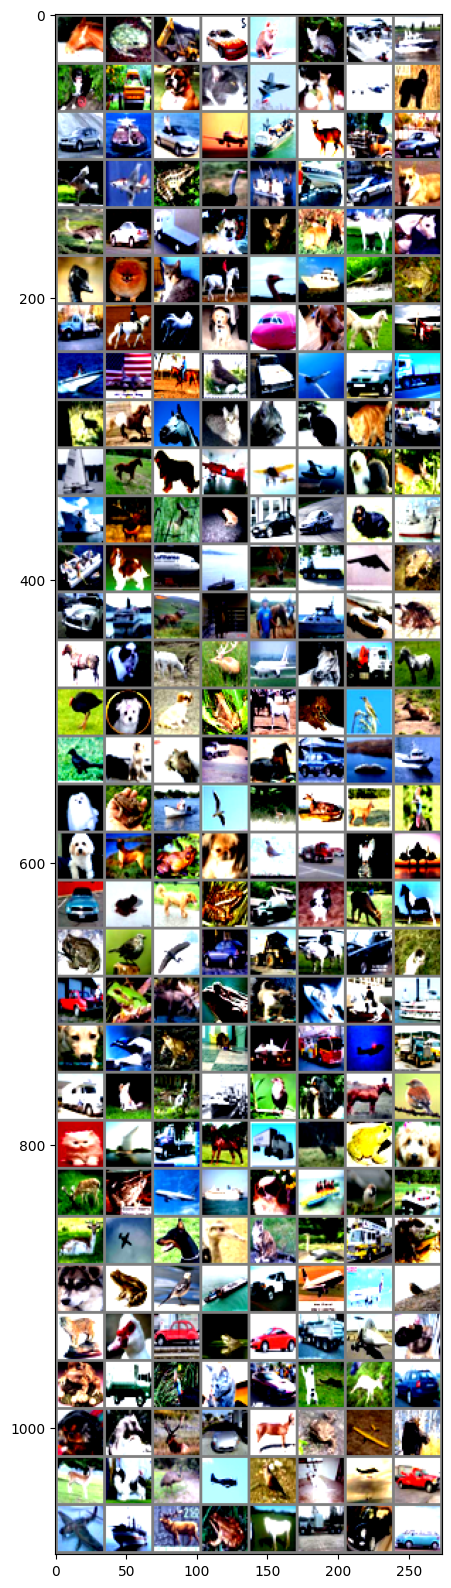

horse  frog truck   car   cat   cat  ship  ship   dog truck   dog   cat plane   cat plane   dog   car  ship   car plane  ship  deer truck   car horse plane  frog  bird  ship  ship   car   dog  bird   car truck   dog  deer  deer horse horse  bird   dog   cat horse  bird  ship  bird  frog truck horse horse   dog plane   dog horse plane  ship plane horse  bird   car plane   car truck  deer horse horse   cat   cat   cat   cat   car  ship horse   dog plane plane plane   dog  deer  ship  deer  deer  frog   car   car   dog  ship  ship   dog plane  ship  deer truck plane  frog   car  ship  deer horse horse  ship   car   cat horse   dog  deer  deer plane horse truck horse  bird   dog   dog  frog horse   dog  bird  deer  bird   dog  frog truck   dog   car  ship  ship   dog  frog  ship  bird  deer  deer  deer  bird   dog   dog  frog   dog  bird truck  bird plane   car  frog   dog  frog truck   dog  deer horse  frog  bird  bird   car truck horse   car   cat   car  frog  deer  frog   dog  ship hors

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the classes in the CIFAR-10 dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10, 20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

# Print labels
print(' '.join('%5s' % label.item() for label in labels))

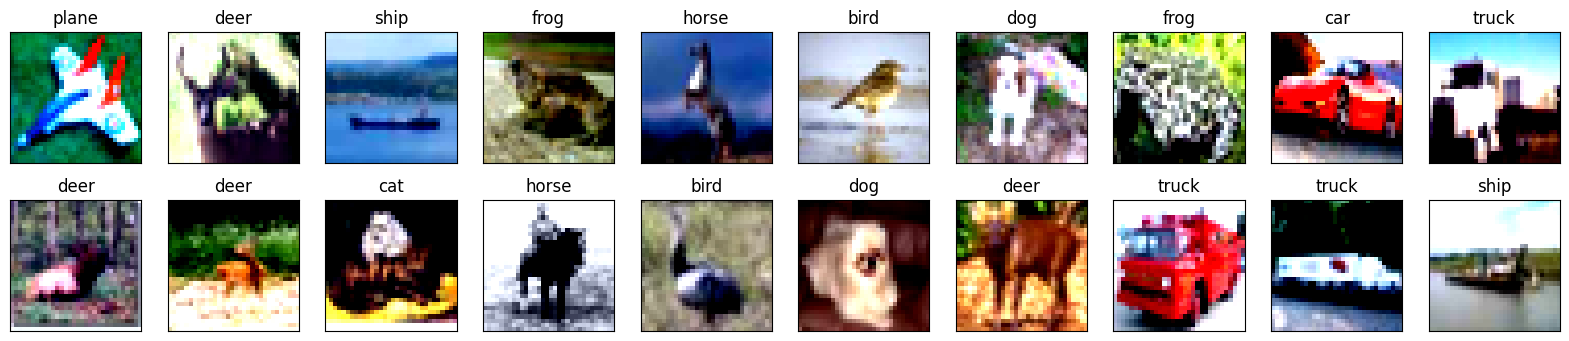

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

### <font color = 'blue'> **3.** Define a CNN model

The CNN model architecture are shown as follows (4 conv layers, 4 pooling layers, 2 fully connected layers).

*conv1->pool1->conv2->pool2->conv3->pool3->conv4->pool4->FC1->FC2*

Specifications of input and output dimensions, kernel sizes, stride, and padding across various layers:

<code>

**conv1**: input dim = 3, output dim = 64, kernel size 3, stride = 1, padding = 1

**conv2**: input dim = 64, output dim = 128, kernel size 3, stride = 1, padding = 1

**conv3**: input dim = 128, output dim = 256, kernel size 3, stride = 1, padding = 1

**conv4**: input dim = 256, output dim = 512, kernel size 3, stride = 1, padding = 1

**pool1**: kernel = 2, stride = 2

**pool2**: kernel = 2, stride = 2

**pool3**: kernel = 2, stride = 2

**pool4**: kernel = 2, stride = 2

**FC1**: input dim = 512 * 2 * 2, output dim = 1024

**FC2**: input dim = 1024, output dim = 10

</code>

Note that, there is always a ReLU activation function applied after each conv layer before the max-pooling layers except for the last dense layer.

Please refer to the colab code [here](https://colab.research.google.com/drive/17yGkfAKlPhj_tZRNR2jl7_PFCp0z1eTl?usp=drive_open#scrollTo=83IyYAGxfnLX).

In [ ]:
## Your code goes here

import torch.nn as nn

class ConvNeuralNet(nn.Module):
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv4 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 2 * 2, 1024)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.pool1(out)

        out = self.conv2(out)
        out = self.relu2(out)
        out = self.pool2(out)

        out = self.conv3(out)
        out = self.relu3(out)
        out = self.pool3(out)

        out = self.conv4(out)
        out = self.relu4(out)
        out = self.pool4(out)

        out = out.view(out.size(0), -1)

        out = self.fc1(out)
        out = self.relu5(out)
        out = self.fc2(out)

        return out

# Create an instance of the ConvNeuralNet class
num_classes = 10
model = ConvNeuralNet(num_classes)

# Print the model architecture
print(model)


ConvNeuralNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (relu5): ReLU()
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)


### <font color = 'blue'> **4.**  Training your customized CNN model.</font>

Apply cross entropy loss, SGD optimizer with momentum = 0.9, batch size = 256, learning rate = 0.001,  epochs = 100.

In [ ]:
# your code goes here

import torch.optim as optim
learning_rate = 0.001

model = ConvNeuralNet(num_classes)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)

total_step = len(train_loader)

#Check the output of the model, loss, and optimizer
print(model)
print(criterion)
print(optimizer)

ConvNeuralNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (relu5): ReLU()
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)
CrossEntropyLoss()
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr:

In [ ]:

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/100], Loss: 2.2853
Epoch [2/100], Loss: 2.1150
Epoch [3/100], Loss: 1.8076
Epoch [4/100], Loss: 1.8051
Epoch [5/100], Loss: 1.7034
Epoch [6/100], Loss: 1.7342
Epoch [7/100], Loss: 1.6508
Epoch [8/100], Loss: 1.4725
Epoch [9/100], Loss: 1.4065
Epoch [10/100], Loss: 1.5846
Epoch [11/100], Loss: 1.3819
Epoch [12/100], Loss: 1.3213
Epoch [13/100], Loss: 1.4305
Epoch [14/100], Loss: 1.1371
Epoch [15/100], Loss: 1.3146
Epoch [16/100], Loss: 1.3097
Epoch [17/100], Loss: 1.3049
Epoch [18/100], Loss: 1.1429
Epoch [19/100], Loss: 1.1805
Epoch [20/100], Loss: 1.2224
Epoch [21/100], Loss: 1.1111
Epoch [22/100], Loss: 1.0192
Epoch [23/100], Loss: 1.2173
Epoch [24/100], Loss: 1.0577
Epoch [25/100], Loss: 0.9743
Epoch [26/100], Loss: 0.9414
Epoch [27/100], Loss: 1.0187
Epoch [28/100], Loss: 0.8539
Epoch [29/100], Loss: 0.9381
Epoch [30/100], Loss: 0.7188
Epoch [31/100], Loss: 1.2145
Epoch [32/100], Loss: 0.9343
Epoch [33/100], Loss: 0.8911
Epoch [34/100], Loss: 0.6616
Epoch [35/100], Loss: 0

### <font color = 'blue'> **5.** Prediction on test dataset
- make prediction on test dataset
- Output the test accuracy for each class

<font>

In [ ]:

# Evaluation mode
model.eval()

correct_predictions_per_class = [0] * num_classes
total_samples_per_class = [0] * num_classes
total_samples = 0
correct_predictions = 0

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Get predicted class
        _, predicted = torch.max(outputs, 1)

        # Update counts for each class
        for i in range(num_classes):
            correct_predictions_per_class[i] += ((predicted == i) & (labels == i)).sum().item()
            total_samples_per_class[i] += (labels == i).sum().item()

        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

# Calculate accuracy for each class
class_accuracies = [correct / total if total > 0 else 0 for correct, total in zip(correct_predictions_per_class, total_samples_per_class)]

# Calculate overall accuracy
overall_accuracy = correct_predictions / total_samples

# Print class-wise accuracy along with class names
for i, class_name in enumerate(classes):
    print('Test Accuracy for {}: {:.2f}%'.format(class_name, class_accuracies[i] * 100))

# Find best and worst performing classes
best_class_index = class_accuracies.index(max(class_accuracies))
worst_class_index = class_accuracies.index(min(class_accuracies))

print('Best Performing Class: {}, Accuracy: {:.2f}%'.format(classes[best_class_index], class_accuracies[best_class_index] * 100))
print('Worst Performing Class: {}, Accuracy: {:.2f}%'.format(classes[worst_class_index], class_accuracies[worst_class_index] * 100))

# Print overall accuracy
print('Overall Accuracy on Test Data: {:.2f}%'.format(overall_accuracy * 100))


Test Accuracy for plane: 84.70%
Test Accuracy for car: 87.90%
Test Accuracy for bird: 67.60%
Test Accuracy for cat: 53.40%
Test Accuracy for deer: 67.40%
Test Accuracy for dog: 57.40%
Test Accuracy for frog: 73.90%
Test Accuracy for horse: 84.60%
Test Accuracy for ship: 81.60%
Test Accuracy for truck: 76.20%
Best Performing Class: car, Accuracy: 87.90%
Worst Performing Class: cat, Accuracy: 53.40%
Overall Accuracy on Test Data: 73.47%


In [ ]:

# Forward pass
outputs = model(images)

# Get predicted labels
_, predicted = torch.max(outputs, 1)

# Print ground truth labels
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

# Print predicted labels
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(len(predicted))))


GroundTruth:  frog  ship  frog  horse cat   truck plane ship  ship  horse horse horse plane cat   horse frog  dog   car   ship  dog   bird  bird  bird  cat   cat   dog   cat   horse deer  cat   frog  car   cat   dog   frog  deer  deer  frog  car   frog  cat   truck bird  plane truck horse car   horse horse dog   bird  frog  cat   frog  ship  plane truck bird  truck bird  plane deer  truck horse frog  ship  deer  dog   bird  dog   cat   frog  car   frog  bird  car   plane plane ship  deer  deer  cat   truck deer  car   ship  ship  car   dog   ship  frog  truck deer  truck deer  cat   dog   cat   dog   plane ship  horse truck dog   dog   dog   cat   plane horse truck bird  dog   horse dog   truck truck ship  deer  car   bird  car   horse plane plane ship  truck car   bird  cat   deer  frog  bird  ship  plane truck plane truck plane bird  truck cat   deer  deer  dog   plane car   ship  horse cat   car   horse bird  plane car   plane deer  dog   dog   cat   plane bird  ship  ship  car   fr